In [1]:
import os, pickle, re, glob, time
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style('ticks')
pd.set_option('precision', 2)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Normalize values

In [2]:
for name in ['AS_et_al', 'AP_et_al', 'SP_et_al']:

    tpm_df = pd.read_csv('../preprocessed_data/scRNAseq/{}_tpm.csv'.format(name), index_col=0)

    tmm_factor_df = pd.read_csv('../preprocessed_data/scRNAseq/normalization_factor/{}_tmm_factor.csv'.format(name), index_col=0)
    tmm_df = tpm_df / tmm_factor_df['x'].values
    tmm_df.to_csv('../preprocessed_data/scRNAseq/{}_tmm.csv'.format(name))

    rle_factor_df = pd.read_csv('../preprocessed_data/scRNAseq/normalization_factor/{}_rle_factor.csv'.format(name), index_col=0)
    rle_df = tpm_df / rle_factor_df['x'].values
    rle_df.to_csv('../preprocessed_data/scRNAseq/{}_rle.csv'.format(name))

    # For UQ, for some cells there are few genes and q75 = 0
#     uq_factor_df = pd.read_csv('../preprocessed_data/scRNAseq/normalization_factor/{}_uq_factor.csv'.format(name), index_col=0)
#     uq_df = tpm_df / uq_factor_df['x'].values
#     uq_df.to_csv('../preprocessed_data/scRNAseq/{}_uq.csv'.format(name))


KeyboardInterrupt: 

# Sanity check for our dataset (AS)

In [22]:
df1 = tpm_df / tmm_factor_df['x'].values # correct
df2 = tpm_df * tmm_factor_df['x'].values

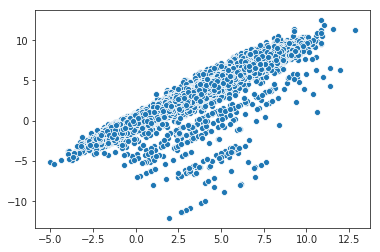

In [28]:
x1 = df1.head(100).values.flatten()
x2 = df2.head(100).values.flatten()
sns.scatterplot(np.log2(x1), np.log2(x2))

Text(0, 0.5, 'Q75')

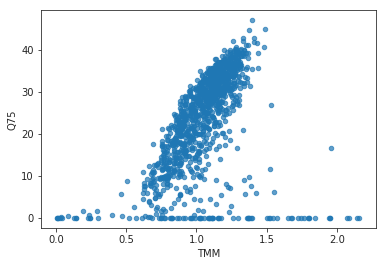

In [32]:

plt.scatter(tmm_factor_df['x'].values, tpm_df.quantile(q=0.75).loc[tmm_factor_df.index].values, s=20, alpha=0.7)
plt.xlabel('TMM')
plt.ylabel('Q75')

In [8]:
count_df = pd.read_csv('../data/HN_patient_specific/star_rsem_output/HN120-182/countdata.csv', index_col=0)
count_df = count_df.set_index('mat57[, 1]')
count_df.index.name = ''

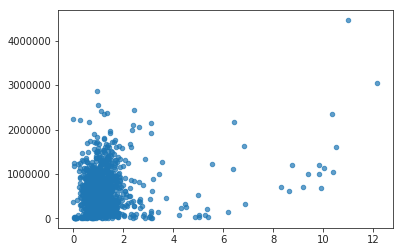

In [14]:
plt.scatter(rle_factor_df['x'].values, count_df.sum().loc[tmm_factor_df.index].values, s=20, alpha=0.7)

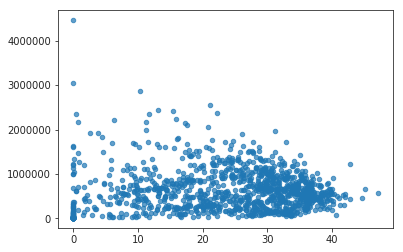

In [16]:
plt.scatter(tpm_df.quantile(q=0.75).loc[tmm_factor_df.index].values, count_df.sum().loc[tmm_factor_df.index].values, s=20, alpha=0.7)